
Input test_noise wave data:


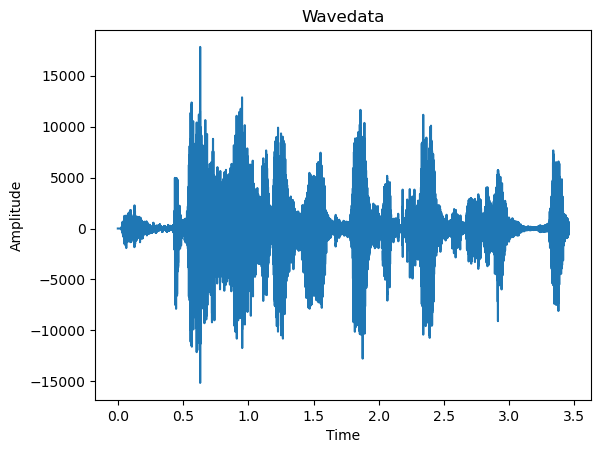

C:\Users\Shubhrika\AppData\Local\Temp\ipykernel_19288\3532236209.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axis_f = np.linspace(0, 100, np.int(len(f_array)))


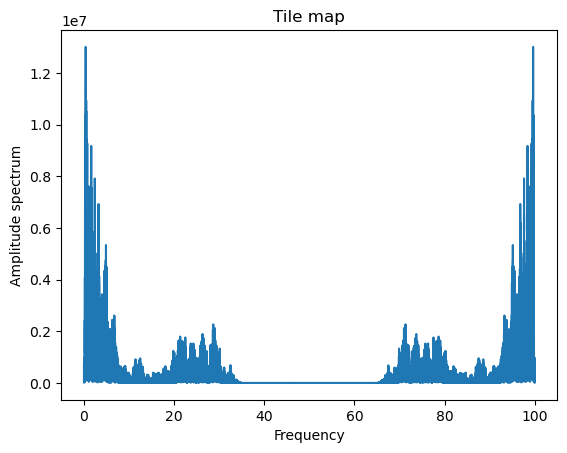

C:\Users\Shubhrika\AppData\Local\Temp\ipykernel_19288\3532236209.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axis_f = np.linspace(0, 100, np.int(len(wave_fft)))


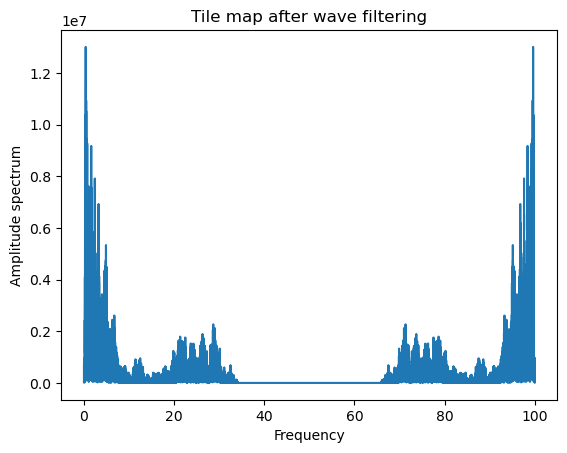

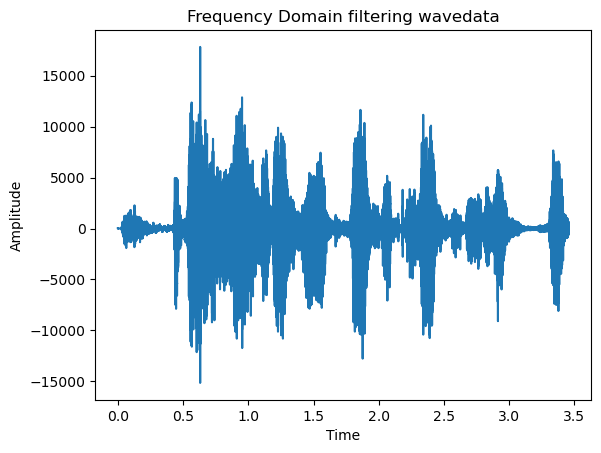

C:\Users\Shubhrika\AppData\Local\Temp\ipykernel_19288\3532236209.py:72: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  f.writeframes(save_wav.tostring())


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import wave as we


def read_wav(wavfile):
    f = wavfile
    params = f.getparams()

    nchannels, sampwidth, framerate, nframes = params[:4]
    strData = f.readframes(nframes)
    waveData = np.frombuffer(strData, dtype=np.int16)

    time = np.arange(0, nframes)*(1.0 / framerate)
    plt.plot(time, waveData)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Wavedata")
    plt.show()
    return (waveData, time)


print("\nInput test_noise wave data:")
f = we.open("Merged_Audio/Merged_audio_15.wav", 'rb')

data, time = read_wav(f)

def fft_wav(waveData):
    f_array = np.fft.fft(waveData)
    f_abs = f_array
    axis_f = np.linspace(0, 100, np.int(len(f_array)))


    plt.plot(axis_f, np.abs(f_abs[0:len(axis_f)]))
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude spectrum")
    plt.title("Tile map")
    plt.show()
    return f_abs

wave_fft = fft_wav(data)

step_hz = 100/(len(data)/2)
tab_hz = 68
new_wav = wave_fft.copy()

for i in range(int(tab_hz/step_hz), (len(wave_fft) - int(tab_hz/step_hz))):
    new_wav[i]=0  

axis_f = np.linspace(0, 100, np.int(len(wave_fft)))
plt.plot(axis_f, np.abs(new_wav[0:len(axis_f)]))

plt.xlabel("Frequency")
plt.ylabel("Amplitude spectrum")
plt.title("Tile map after wave filtering")
plt.show()

filtered_wave = np.fft.ifft(new_wav)
plt.plot(time, filtered_wave.real)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Frequency Domain filtering wavedata")
plt.show()

save_wav = filtered_wave.real.reshape((len(filtered_wave), 1)).T.astype(np.short)
f = we.open("freq_flitering.wav", "wb")

f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(16000)
f.writeframes(save_wav.tostring())
f.close()